In [45]:
import numpy as np
import pandas as pd
import yfinance as yf

## 1. Downloading The Monthly Data of Apple

In [46]:
Data=yf.download(['AAPL','^GSPC'],start="2018-01-01",end="2023-01-01")['Adj Close'].resample('m').last()

[*********************100%***********************]  2 of 2 completed


In [47]:
Data.head()

,AAPL,^GSPC
Date,,
2018-01-31 00:00:00-05:00,39.741604,2823.810059
2018-02-28 00:00:00-05:00,42.451378,2713.830078
2018-03-31 00:00:00-04:00,39.987061,2640.870117
2018-04-30 00:00:00-04:00,39.386467,2648.050049
2018-05-31 00:00:00-04:00,44.708508,2705.270020


## 2. Calculating Monthly Log Return 

#### simple return has unlimited upside return, but downside is limited, capped at -100%
#### Cap on downside makes value inaccurate when we calculate the mean
#### $log(1+r)$ has no constraints on either upside or downside

In [48]:
Data['Log_Apple_Return']=np.log(Data['AAPL']/Data['AAPL'].shift(1))
Data['Log_Market_Return']=np.log(Data['^GSPC']/Data['^GSPC'].shift(1))
Data.dropna(inplace=True)

In [49]:
Data=Data[['Log_Apple_Return','Log_Market_Return']] # rename to log returns?
Data.head()

,Log_Apple_Return,Log_Market_Return
Date,,
2018-02-28 00:00:00-05:00,0.065961,-0.039726
2018-03-31 00:00:00-04:00,-0.059803,-0.027252
2018-04-30 00:00:00-04:00,-0.015134,0.002715
2018-05-31 00:00:00-04:00,0.126742,0.021378
2018-06-30 00:00:00-04:00,-0.009463,0.004831


## 3. Computing the Beta

### First Way 

In [50]:
covariance_matrix=Data.cov()
covariance_matrix

,Log_Apple_Return,Log_Market_Return
Log_Apple_Return,0.008615,0.003682
Log_Market_Return,0.003682,0.002947


In [51]:
Beta=covariance_matrix.iloc[0,1]/covariance_matrix.iloc[1,1]
print("Beta of the stock is ",Beta)

Beta of the stock is  1.2492166423248385


### Regression 

In [52]:
import statsmodels.api as sm

Market=Data['Log_Market_Return']
Security=Data['Log_Apple_Return']
Market=sm.add_constant(Market)

capm_model=sm.OLS(Security,Market).fit() # fitting linearn regression 

print(capm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Log_Apple_Return   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     65.28
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           5.06e-11
Time:                        14:32:21   Log-Likelihood:                 79.556
No. Observations:                  59   AIC:                            -155.1
Df Residuals:                      57   BIC:                            -151.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0135      0.00

In [53]:
capm_model.params

const                0.013546
Log_Market_Return    1.249217
dtype: float64

In [54]:
Risk_Free_Rate=capm_model.params[0]
Risk_Free_Rate

0.013546498053630403

## 4. Building The CAPM Function

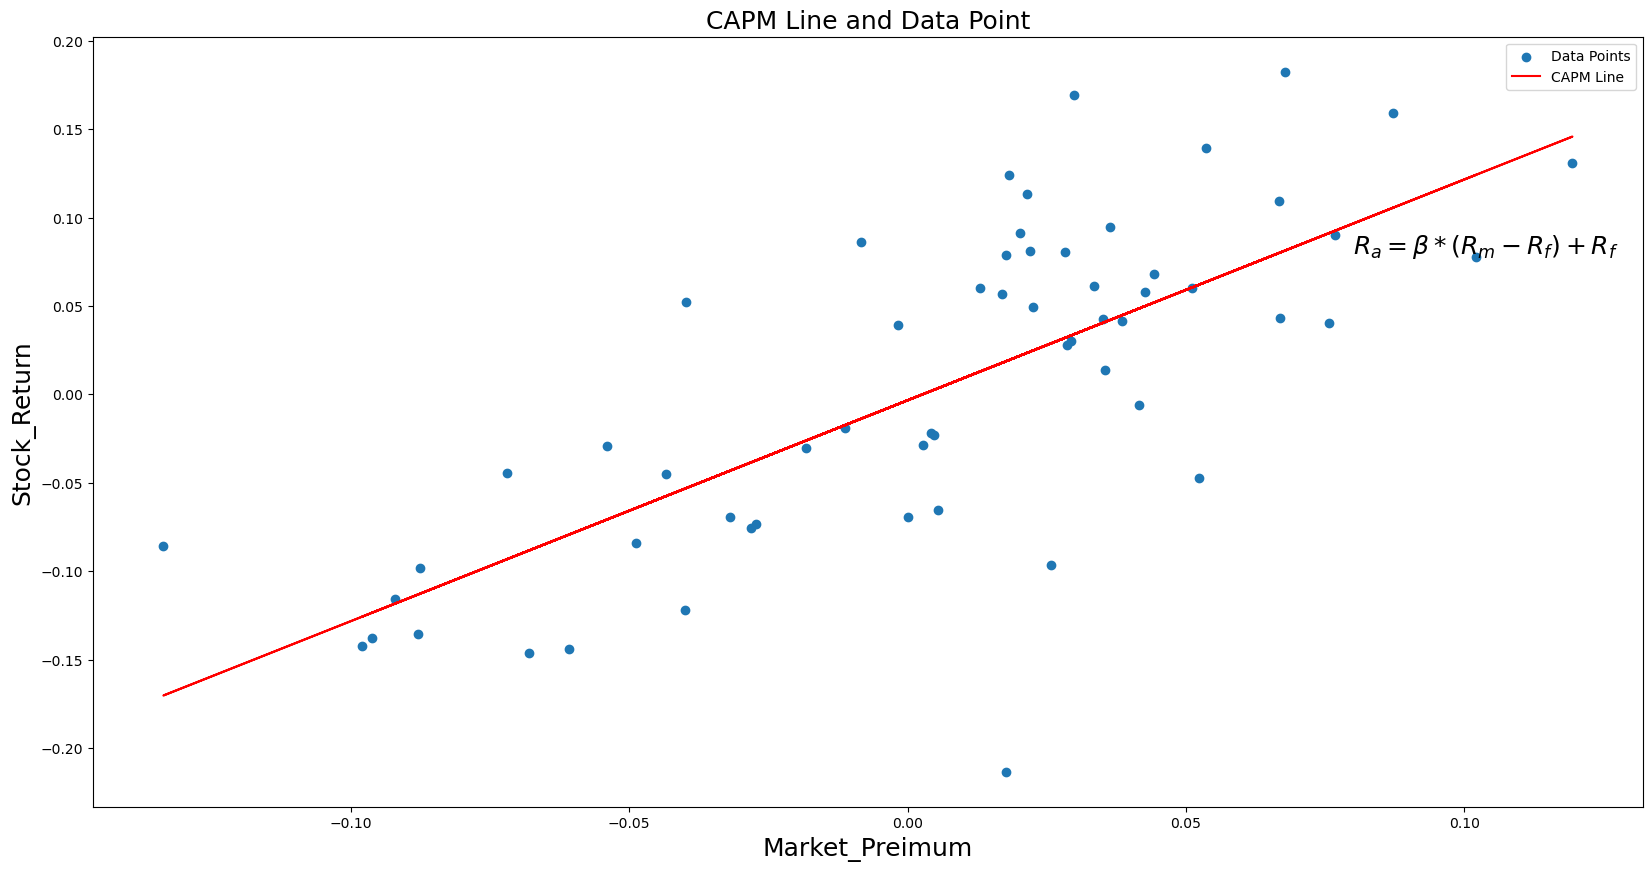

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.scatter(Data['Log_Market_Return'], Data['Log_Apple_Return']-Risk_Free_Rate, label="Data Points") # plotting all the data points


plt.plot(Data['Log_Market_Return'], Risk_Free_Rate+(Beta*(Data['Log_Market_Return']-Risk_Free_Rate)),
         color="Red", label="CAPM Line") # CAPM line

plt.title("CAPM Line and Data Point", fontsize=18)
plt.ylabel("Stock_Return", fontsize=18)
plt.xlabel("Market_Preimum", fontsize=18)


plt.text(0.08, 0.08, r'$R_a = \beta * (R_m-R_f) + R_f$', fontsize=18)# this is the location of the text
plt.legend()
plt.show()

## 5. Making Investment Decision 

In [56]:
# required rate of return 
Required_Risk_Free_Rate=Risk_Free_Rate+((Beta*(Data['Log_Market_Return'].mean()-Risk_Free_Rate)))

In [57]:
Required_Risk_Free_Rate

0.0031295495198258236

### Return on Equity 147.94% From Yahoo Finance

## Potential Investment Opportunity since Return on equity is higher than required risk of return 